1.0 Project Problem Definition : TITANIC SURVIVAL PREDICTION

2.0 Preparing the Data

2.1 Import the Dependency

In [46]:
# Importing the needed modules for this project
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2.2 Loading the Data

In [47]:
# load the data.

df = pd.read_csv("C:/Users/FASANXI SODIQ/codesoft project datasets/movies.csv ")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [48]:
df['director']

0       Stanley Kubrick
1        Randal Kleiser
2        Irvin Kershner
3          Jim Abrahams
4          Harold Ramis
             ...       
7663      Joseph Ebanks
7664       Dusty Dukatz
7665       Nkanya Nkwai
7666      James Randall
7667       Pereko Mosia
Name: director, Length: 7668, dtype: object

In [49]:
df['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [50]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


2.3 Exploratory Analysis

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [52]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
# fill rating's null value with mode rating
most_appears_rating = df['rating'].mode()
most_appears_rating = str(most_appears_rating)
df['rating'] = df['rating'].fillna(most_appears_rating )
# fill score's null value with median score
middle_score = round(df['score'].median(),1)
df['score'] = df['score'].fillna(middle_score)
# fill votes's null value with median vote
middle_votes = round(df['votes'].median(),1)
df['votes'] = df['votes'].fillna(middle_votes)
# fill writer's null value with mode writer
most_appears_writer = df['writer'].mode() 
most_appears_writer = str(most_appears_writer)
df['writer'] = df['writer'].fillna(most_appears_writer)
# fill star's null value with mode star
most_appear_star = df['star'].mode()
most_appear_star = str(most_appear_star)
df['star'] = df['star'].fillna(most_appear_star)
# fill writer's null value with mode company
most_appear_company = df['company'].mode()
most_appear_company = str(most_appear_company)
df['company'] = df['company'].fillna(most_appear_company)
# fill runtime's null value with mode runtime
middle_runtime = df['runtime'].median()
df['runtime'] = df['runtime'].fillna(middle_runtime)
# fill gross's null value with median gross.
middle_gross = df['gross'].median()
df['gross'] = df['gross'].fillna(middle_gross)
# fill country's null value with mode country
most_appear_country = df['country'].mode()
most_appear_country = str(most_appear_country)
df['country'] = df['country'].fillna(most_appear_country)
# fill released's null value with mode released
most_appear_released = df['released'].mode()
most_appear_released = str(most_appear_released)
df['released'] = df['released'].fillna(most_appear_released)
# fill budget's null value with median budget
middle_budget = df['budget'].median()
df['budget'] = df['budget'].fillna(middle_budget)

In [55]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

2.5 Features Engineering/Features Transformation

In [56]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
data = df[[ 'rating', 'genre', 'director', 'writer', 'star', 'country', 'company']]
for i in data:
    ohe = LabelEncoder()
    if i == 'rating':
        encoded_rating = ohe.fit_transform(df['rating'])
        df['rating'] = encoded_rating
    elif i == 'genre':
        encoded_genre = ohe.fit_transform(df['genre'])
        df['genre'] = encoded_genre
    elif i == 'director':
        encoded_director = ohe.fit_transform(df['director'])
        df['director'] = encoded_director
    elif i == 'writer':
        encoded_writer = ohe.fit_transform(df['writer'])
        df['writer'] = encoded_writer   
    elif i == 'star':
        encoded_star = ohe.fit_transform(df['star'])
        df['star'] = encoded_star   
        
    elif i == 'country':
        encoded_country = ohe.fit_transform(df['country'])
        df['country'] = encoded_country   
        
    else :
        encoded_company = ohe.fit_transform(df['company'])
        df['company'] = encoded_company   
        
encoded_df = df.drop(['name', 'released'], axis = 1)        
        

In [57]:
encoded_df.head()

,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,7,6,1980,8.4,927000.0,2589,4015,1048,55,19000000.0,46998772.0,2320,146.0
1,7,1,1980,5.8,65000.0,2269,1633,328,56,4500000.0,58853106.0,732,104.0
2,5,0,1980,8.7,1200000.0,1111,2568,1746,56,18000000.0,538375067.0,1541,124.0
3,5,4,1980,7.7,221000.0,1301,2001,2247,56,3500000.0,83453539.0,1813,88.0
4,7,4,1980,7.3,108000.0,1054,522,411,56,6000000.0,39846344.0,1778,98.0


In [58]:
encoded_df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,7668.0,6.137976e+00,1.300140e+00,0.0,6.00,6.0,7.00,1.200000e+01
genre,7668.0,3.633281e+00,2.759259e+00,0.0,1.00,4.0,6.00,1.800000e+01
year,7668.0,2.000405e+03,1.115351e+01,1980.0,1991.00,2000.0,2010.00,2.020000e+03
score,7668.0,6.390454e+00,9.686545e-01,1.9,5.80,6.5,7.10,9.300000e+00
votes,7668.0,8.808694e+04,1.632954e+05,7.0,9100.00,33000.0,93000.00,2.400000e+06
director,7668.0,1.516121e+03,8.544099e+02,0.0,786.00,1519.5,2272.00,2.948000e+03
writer,7668.0,2.293103e+03,1.307365e+03,0.0,1159.00,2270.0,3414.00,4.535000e+03
star,7668.0,1.404863e+03,8.152645e+02,0.0,696.00,1374.5,2137.25,2.814000e+03
country,7668.0,4.946453e+01,1.488477e+01,0.0,55.00,56.0,56.00,5.900000e+01
budget,7668.0,3.131756e+07,3.575273e+07,3000.0,14000000.00,20500000.0,32000000.00,3.560000e+08


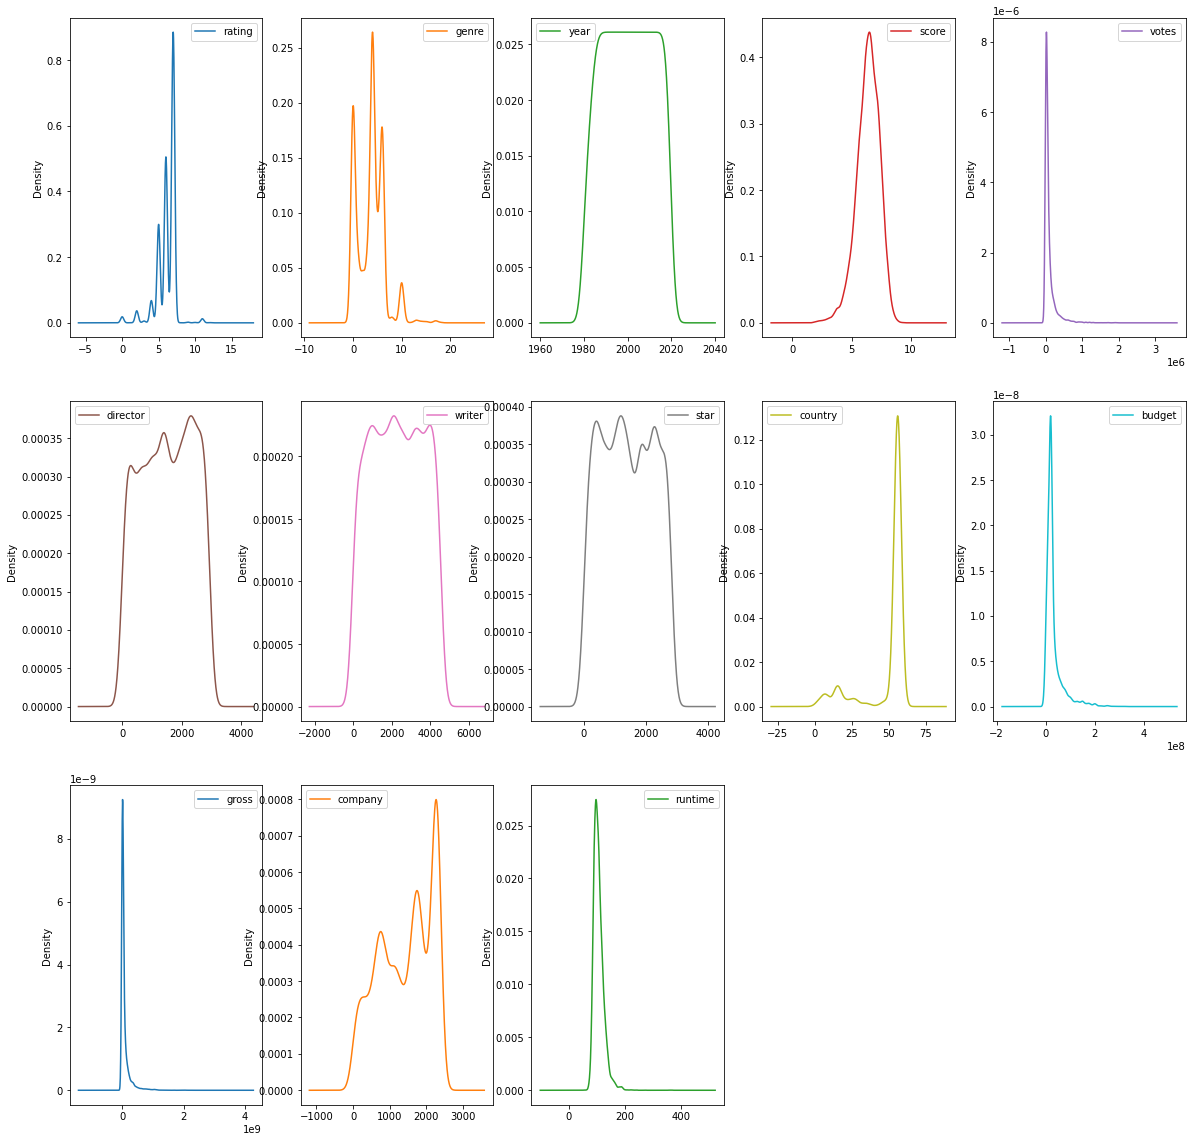

In [59]:
# check for normal distribution of data.
encoded_df.plot(kind='density', subplots=True, layout=(3,5), sharex=False)
plt.gcf().set_size_inches(20,20)
plt.show()

In [60]:
from numpy import set_printoptions 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, QuantileTransformer 
dfArr = encoded_df.values
labels = encoded_df.columns
col = labels[1:]
x = dfArr[:, 1:]
y = np.array(dfArr[:, 0]).reshape(-1,1)

In [61]:
sts = MinMaxScaler()
scaled_x = sts.fit_transform(x)
scaled_y = sts.fit_transform(y)
set_printoptions(precision=2)
scaled_x

array([[0.33, 0.  , 0.88, ..., 0.02, 0.97, 0.29],
       [0.06, 0.  , 0.53, ..., 0.02, 0.31, 0.16],
       [0.  , 0.  , 0.92, ..., 0.19, 0.65, 0.22],
       ...,
       [0.33, 1.  , 0.51, ..., 0.01, 0.39, 0.16],
       [0.33, 1.  , 0.62, ..., 0.01, 0.  , 0.21],
       [0.56, 1.  , 0.51, ..., 0.01, 0.75, 0.15]])

In [62]:
scaled_df = pd.DataFrame(scaled_x , columns = col)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
genre,7668.0,0.201849,0.153292,0.0,0.055556,0.222222,0.333333,1.0
year,7668.0,0.510136,0.278838,0.0,0.275000,0.500000,0.750000,1.0
score,7668.0,0.606818,0.130899,0.0,0.527027,0.621622,0.702703,1.0
votes,7668.0,0.036700,0.068040,0.0,0.003789,0.013747,0.038747,1.0
director,7668.0,0.514288,0.289827,0.0,0.266621,0.515434,0.770692,1.0
writer,7668.0,0.505646,0.288283,0.0,0.255568,0.500551,0.752811,1.0
star,7668.0,0.499240,0.289717,0.0,0.247335,0.488451,0.759506,1.0
country,7668.0,0.838382,0.252284,0.0,0.932203,0.949153,0.949153,1.0
budget,7668.0,0.087963,0.100430,0.0,0.039318,0.057576,0.089880,1.0
gross,7668.0,0.027066,0.057571,0.0,0.001644,0.007096,0.025505,1.0


In [63]:
scaled_df

,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,0.333333,0.0,0.878378,0.386248,0.878223,0.885336,0.372424,0.932203,0.053363,0.016507,0.972746,0.292605
1,0.055556,0.0,0.527027,0.027080,0.769674,0.360088,0.116560,0.949153,0.012632,0.020670,0.306918,0.157556
2,0.000000,0.0,0.918919,0.499999,0.376866,0.566262,0.620469,0.949153,0.050554,0.189086,0.646122,0.221865
3,0.222222,0.0,0.783784,0.092081,0.441316,0.441235,0.798507,0.949153,0.009823,0.029310,0.760168,0.106109
4,0.222222,0.0,0.729730,0.044997,0.357531,0.115105,0.146055,0.949153,0.016846,0.013995,0.745493,0.138264
...,...,...,...,...,...,...,...,...,...,...,...,...
7663,0.333333,1.0,0.162162,0.000005,0.508820,0.504961,0.860697,0.949153,0.000011,0.007096,0.001258,0.112540
7664,0.222222,1.0,0.378378,0.000012,0.262551,0.576626,0.670576,0.949153,0.057576,0.007096,0.226415,0.112540
7665,0.333333,1.0,0.513514,0.000009,0.699118,0.591841,0.725302,0.949153,0.000157,0.007096,0.394969,0.157556
7666,0.333333,1.0,0.621622,0.013747,0.401628,0.402426,0.160270,0.949153,0.000034,0.007096,0.001258,0.209003


In [64]:
# Normalizing the training sets
qt =  QuantileTransformer(n_quantiles=100, output_distribution='normal')
qt_x = qt.fit_transform(scaled_x)
qt_y = qt.fit_transform(scaled_y)
set_printoptions(precision=2)
col = labels[1:]

qt_df = pd.DataFrame(qt_x, columns = col)
qt_df['rating'] = y
qt_df.describe().T



,count,mean,std,min,25%,50%,75%,max
genre,7668.0,-0.864668,2.404354,-5.199338,-0.666564,0.063341,1.008673,5.199338
year,7668.0,-0.022911,1.135657,-5.199338,-0.666564,-0.025322,0.666564,5.199338
score,7668.0,0.000164,0.993556,-5.199338,-0.682458,0.050661,0.698526,5.199338
votes,7668.0,-0.001509,0.996465,-5.199338,-0.671843,0.012660,0.674490,5.199338
director,7668.0,0.001691,1.003709,-5.199338,-0.670922,-0.001730,0.672734,5.199338
writer,7668.0,0.000041,1.001656,-5.199338,-0.675615,-0.001860,0.672648,5.199338
star,7668.0,-0.000500,0.997566,-5.199338,-0.669729,0.002911,0.672299,5.199338
country,7668.0,-0.067830,0.763599,-5.199338,-0.731217,0.362241,0.362241,5.199338
budget,7668.0,-0.004621,0.995536,-5.199338,-0.666564,0.000000,0.682458,5.199338
gross,7668.0,-0.003912,0.997480,-5.199338,-0.677907,0.000000,0.674143,5.199338


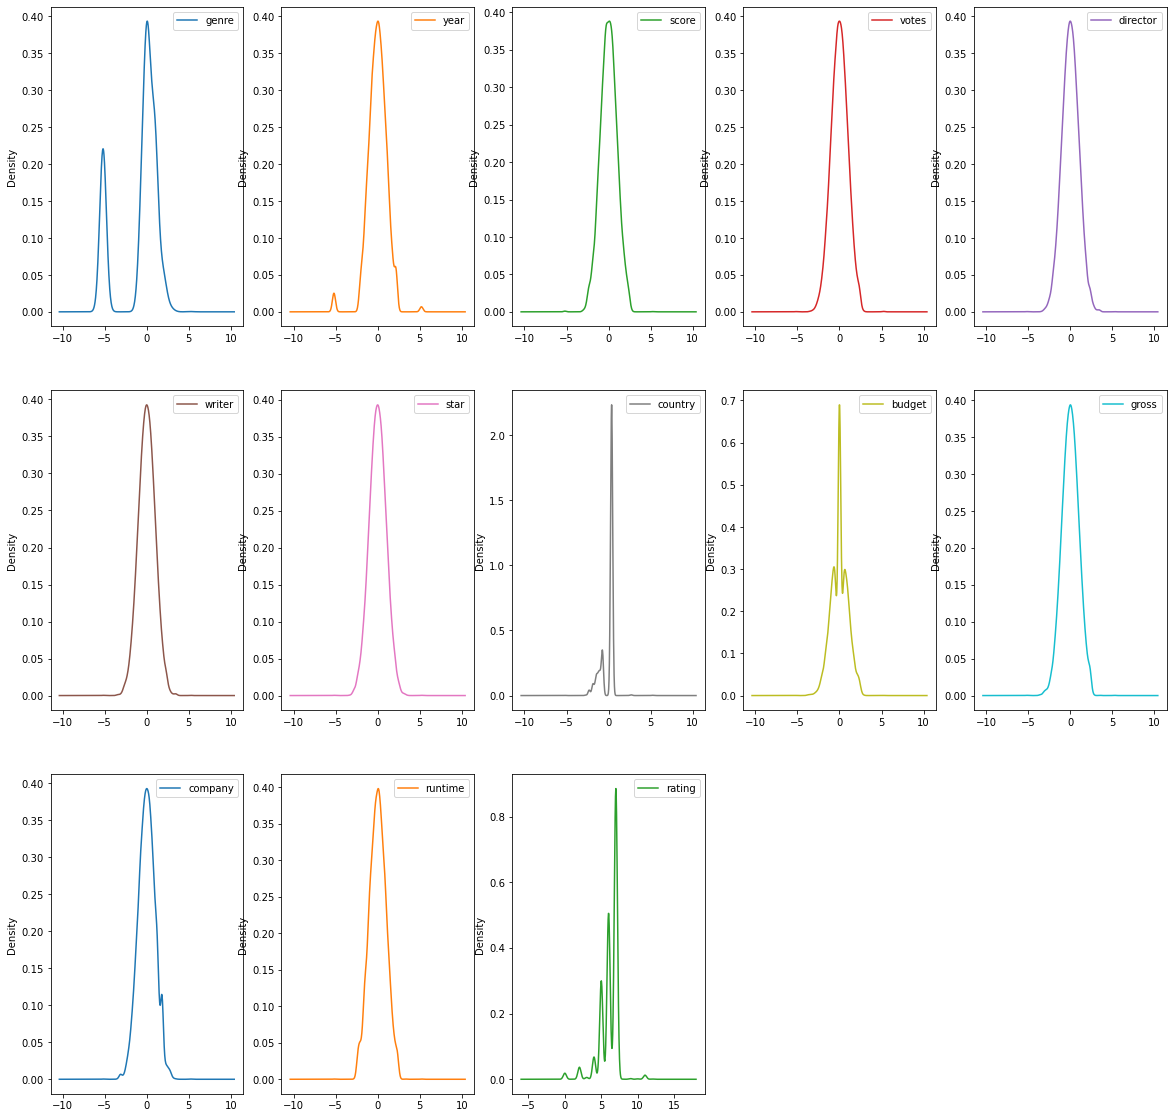

In [65]:
# check for normal distribution of scaled data.
qt_df.plot(kind='density', subplots=True, layout=(3,5), sharex=False)
plt.gcf().set_size_inches(20,20)
plt.show()

In [66]:
X = qt_x
Y = encoded_df['rating']

In [67]:
# feature selection
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
model = LinearRegression()
rfe = RFE(model,7)
fit = rfe.fit(X,Y)
print("num of features:", fit.n_features_)
print("selected features:", fit.support_)
print("feature ranking:", fit.ranking_)
# The best 7 features that best fit the model are :['genre', 'year', 'score','director','country', 'company', 'runtime']

num of features: 7
selected features: [False  True  True  True False False False  True  True  True False  True]
feature ranking: [3 1 1 1 6 5 4 1 1 1 2 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [68]:
encoded_df.head(3)

,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,7,6,1980,8.4,927000.0,2589,4015,1048,55,19000000.0,46998772.0,2320,146.0
1,7,1,1980,5.8,65000.0,2269,1633,328,56,4500000.0,58853106.0,732,104.0
2,5,0,1980,8.7,1200000.0,1111,2568,1746,56,18000000.0,538375067.0,1541,124.0


In [69]:
# split the scaled data into train_set and test_set
from sklearn.model_selection import train_test_split, cross_val_score, KFold
X = qt_df.drop(['votes', 'writer', 'star', 'budget', 'gross','rating'], axis = 1).values
Y = encoded_df['rating'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state= 42)
print("X_train :", x_train.shape)
print("X_test :", x_test.shape)
print("Y_train :", y_train.shape)
print("Y_test:", y_test.shape)

X_train : (6134, 7)
X_test : (1534, 7)
Y_train : (6134,)
Y_test: (1534,)


LINEAR REGRESSOR MODEL

In [70]:
# model building
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)
reg_y_pred = linear_reg_model.predict(x_test)
reg_ypred = np.round(reg_y_pred , 0)
# evaluate the model
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from numpy import sqrt
reg_MSE = mean_squared_error(y_test, reg_y_pred)
reg_RMSE = sqrt(reg_MSE)
reg_score = r2_score(y_test, reg_y_pred)
print("Linear Regression MSE :",reg_MSE)
print("Linear Regression RMSE :",reg_RMSE)
print("Linear Regression R2_Score :", reg_score)

Linear Regression MSE : 1.7423010631608766
Linear Regression RMSE : 1.3199625233925685
Linear Regression R2_Score : 0.01729264146674192


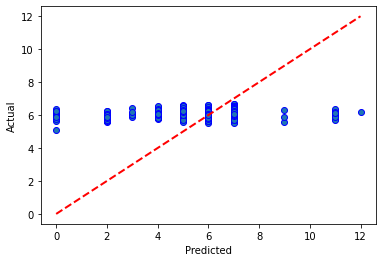

In [71]:
fig, ax = plt.subplots()
ax.scatter(y_test, reg_y_pred, edgecolors=(0,0,1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--',lw=2)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

In [72]:
# comparing predicted with actual rating
col = ['predicted rating', 'actual rating']
result = pd.DataFrame(list(zip(reg_y_pred, y_test)), columns=col)
result.head()

,predicted rating,actual rating
0,6.320740,7
1,6.258835,7
2,6.276528,5
3,6.176237,7
4,6.108771,5


SUPPORT VECTOR REGRESSOR MODEL

In [73]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train)
svm_y_pred = svr_model.predict(x_test)
svm_ypred = np.round(svm_y_pred , 0)
svm_MSE = mean_squared_error(y_test, svm_y_pred)
svm_RMSE = sqrt(svm_MSE)
svm_score = r2_score(y_test, svm_y_pred)
print("Support Vector Regression MSE :",svm_MSE)
print("Support Vector Regression RMSE :",svm_RMSE)
print("Support Vector Regression R2_Score :", reg_score)

Support Vector Regression MSE : 1.6630975742687246
Support Vector Regression RMSE : 1.2896114043651772
Support Vector Regression R2_Score : 0.01729264146674192


In [74]:
# comparing predicted with actual rating
col2 = ['predicted rating', 'actual rating']
result2 = pd.DataFrame(list(zip(svm_y_pred, y_test)), columns=col2)
result2.head()

,predicted rating,actual rating
0,6.709435,7
1,6.488684,7
2,6.229122,5
3,6.775471,7
4,6.258825,5


DECISION TREE REGRESSOR MODEL

In [75]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(random_state = 0)
dtr_model.fit(x_train, y_train)
dtr_y_pred = dtr_model.predict(x_test)
dtr_ypred = np.round(dtr_y_pred , 0)
dtr_MSE = mean_squared_error(y_test, dtr_y_pred)
dtr_RMSE = sqrt(dtr_MSE)
dtr_score = r2_score(y_test, dtr_y_pred)
print("Decision Tree Regression MSE :",dtr_MSE)
print("Decision Tree Regression RMSE :",dtr_RMSE)
print("Decision Tree Regression R2_Score :", dtr_score)

Decision Tree Regression MSE : 2.7581486310299868
Decision Tree Regression RMSE : 1.660767482530287
Decision Tree Regression R2_Score : -0.5556742821038665


In [76]:
# comparing predicted with actual rating
col3 = ['predicted rating', 'actual rating']
result3 = pd.DataFrame(list(zip(dtr_y_pred, y_test)), columns=col3)
result3.head()

,predicted rating,actual rating
0,6.0,7
1,6.0,7
2,6.0,5
3,7.0,7
4,7.0,5


RANDOM FOREST REGRESSOR

In [77]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)
rfr_y_pred = rfr_model.predict(x_test)
rfr_ypred = np.round(rfr_y_pred , 0)
rfr_MSE = mean_squared_error(y_test, rfr_y_pred)
rfr_RMSE = sqrt(rfr_MSE)
rfr_score = r2_score(y_test, rfr_y_pred)
print("Random Forest Regression MSE :",rfr_MSE)
print("Random Forest Regression RMSE :",rfr_RMSE)
print("Random Forest Regression R2_Score :", rfr_score)

Random Forest Regression MSE : 1.4484277705345503
Random Forest Regression RMSE : 1.2035064480652151
Random Forest Regression R2_Score : 0.1830455375915735


In [78]:
# comparing predicted with actual rating
col4 = ['predicted rating', 'actual rating']
result4 = pd.DataFrame(list(zip(rfr_ypred, y_test)), columns=col4)
result4.head()

,predicted rating,actual rating
0,7.0,7
1,7.0,7
2,6.0,5
3,6.0,7
4,7.0,5


In [79]:
from xgboost import XGBRegressor
xgbr_model = XGBRegressor(verbosity=0)
xgbr_model.fit(x_train, y_train)
xgbr_y_pred = xgbr_model.predict(x_test)
xgbr_ypred = np.round(xgbr_y_pred , 0)
xgbr_MSE = mean_squared_error(y_test, xgbr_y_pred)
xgbr_RMSE = sqrt(xgbr_MSE)
xgbr_score = r2_score(y_test, xgbr_y_pred)
print("Random Forest Regression MSE :",xgbr_MSE)
print("Random Forest Regression RMSE :",xgbr_RMSE)
print("Random Forest Regression R2_Score :", xgbr_score)

Random Forest Regression MSE : 1.4552324277388489
Random Forest Regression RMSE : 1.2063301487316185
Random Forest Regression R2_Score : 0.1792075173731682


In [80]:
xgbr_model.score(x_train, y_train)

0.8079103008676815

In [81]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import L2
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping as est

In [82]:
tf_model = Sequential([Dense(units=100, input_dim=7, activation='relu', kernel_initializer = 'normal',
                                  kernel_regularizer = L2(0.01) ),
                       Dense(units=49, activation='relu', kernel_initializer = 'normal',
                            kernel_regularizer = L2(0.01) ),
                       Dense(units=1, activation='linear',kernel_initializer = 'normal', 
                             kernel_regularizer = L2(0.01) )
                       ])
tf_model.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['mean_absolute_error'])
es = est(monitor='mean_absolute_error', patience=5)
            # calling the callback function
history = tf_model.fit(x_train, y_train, batch_size=5, epochs=5,
                                    validation_data = (x_test, y_test),verbose=1, callbacks=[es])

Epoch 1/5
1227/1227 [==============================] - 2s 1ms/step - loss: 3.8083 - mean_absolute_error: 1.2574 - val_loss: 1.9135 - val_mean_absolute_error: 0.9268
Epoch 2/5
1227/1227 [==============================] - 1s 1ms/step - loss: 1.7921 - mean_absolute_error: 0.9109 - val_loss: 1.8256 - val_mean_absolute_error: 0.9388
Epoch 3/5
1227/1227 [==============================] - 1s 1ms/step - loss: 1.7372 - mean_absolute_error: 0.9055 - val_loss: 2.1849 - val_mean_absolute_error: 0.9516
Epoch 4/5
1227/1227 [==============================] - 1s 1ms/step - loss: 1.7009 - mean_absolute_error: 0.8955 - val_loss: 1.8284 - val_mean_absolute_error: 0.9114
Epoch 5/5
1227/1227 [==============================] - 1s 1ms/step - loss: 1.7032 - mean_absolute_error: 0.8955 - val_loss: 1.7881 - val_mean_absolute_error: 0.9486


In [83]:
prediction = tf_model.predict(x_test).astype(int)
ytest = y_test
df1= pd.DataFrame(list(zip(ytest, prediction)), columns=['Testing Data', 'Model Predictions'])
df1

48/48 [==============================] - 0s 1ms/step


,Testing Data,Model Predictions
0,7,[6]
1,7,[5]
2,5,[6]
3,7,[5]
4,5,[5]
...,...,...
1529,5,[5]
1530,6,[5]
1531,7,[6]
1532,5,[5]


In [84]:
metrics_name =  ['LR' ,'SVM', 'DTR', 'RFR', 'XGB']
idx = ['Mean Square Error', 'Root Mean Square Error','R2_Score']
mse_list = [reg_MSE, svm_MSE, dtr_MSE, rfr_MSE, xgbr_MSE]
rmse_list =  [reg_RMSE, svm_RMSE, dtr_RMSE, rfr_RMSE, xgbr_RMSE]
r2_score_list =   [reg_score, svm_score, dtr_score, rfr_score, xgbr_score]
df_metrics = pd.DataFrame([ mse_list,rmse_list,r2_score_list], columns =metrics_name, index=idx).T
df_metrics

,Mean Square Error,Root Mean Square Error,R2_Score
LR,1.742301,1.319963,0.017293
SVM,1.663098,1.289611,0.061966
DTR,2.758149,1.660767,-0.555674
RFR,1.448428,1.203506,0.183046
XGB,1.455232,1.206330,0.179208
